- Вызов внешнего API с параметрами, конвертация и сохранение в БД 2+ ресурсов
- Rest-ресурс с созданием пользовательского профиля и указанием предпочтений
- На основе профиля пользователя,  выводить только ресурсы, к которым у пользователя есть доступ
- Возвращать html + css версию (реализовать шаблон с использованием css) или json версию в зависимости от запроса
- Postman коллекция, иллюстрирующая работу системы
- Код с комментариями и картинками в колаб

In [ ]:
!pip install dnspython

     |████████████████████████████████| 245kB 5.0MB/s 


In [ ]:
!pip install mongoengine

     |████████████████████████████████| 112kB 5.1MB/s 


In [ ]:
mydb = 'olesia'

In [ ]:
import mongoengine as m
from mongoengine import *


In [ ]:
m.connect(host="mongodb+srv://hci2020.evc7n.mongodb.net",
                        username = "studenthci",
                        password="Kanta!3K1",
                        db = mydb)

MongoClient(host=['hci2020-shard-00-01.evc7n.mongodb.net:27017', 'hci2020-shard-00-00.evc7n.mongodb.net:27017', 'hci2020-shard-00-02.evc7n.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, authsource='admin', replicaset='atlas-wtk4cj-shard-0', ssl=True, read_preference=Primary())

In [ ]:
import requests
r = requests.get(f'https://api.punkapi.com/v2/beers?ibu_gt=70')
b = r.json()

In [ ]:
class Drinks(Document):
    drink = StringField()
    yeast = StringField()
    brewed_before=DateField()

In [ ]:
for i in range(len(b)):
  drink = Drinks(drink= b[i]["name"], yeast= b[i]["ingredients"]["yeast"], brewed_before=b[i]["first_brewed"]).save()

In [ ]:
for work in Drinks.objects:
    print(work.yeast)

Wyeast 1056 - American Ale™
Wyeast 1272 - American Ale II™
Wyeast 1056 - American Ale™
Wyeast 1056 - American Ale™
Wyeast 1056 - American Ale™
Wyeast 1272 - American Ale II™
Wyeast 1272 - American Ale II™
Wyeast 1272 - American Ale II™
Wyeast 1272 - American Ale II™
Wyeast 1272 - American Ale II™
Wyeast 1272 - American Ale II™
Wyeast 1056 - American Ale™
WLP099 - Super High Gravity Ale
Wyeast 1272 - American Ale II™
Wyeast 1272 - American Ale II™
Wyeast 1272 - American Ale II™
Wyeast 1056 - American Ale™
Wyeast 1272 - American Ale II™
Champagne
Wyeast 1272 - American Ale II™
Wyeast 1272 - American Ale II™
Wyeast 1272 - American Ale II™
Wyeast 1056 - American Ale™
Wyeast 1272 - American Ale II™
Wyeast 1272 - American Ale II™
Wyeast 1056 - American Ale™
Wyeast 1272 - American Ale II™
Wyeast 1056 - American Ale™
Wyeast 1056 - American Ale™
Wyeast 1056 - American Ale™
Wyeast 1272 - American Ale II™
Wyeast 1272 - American Ale II™
Wyeast 1272 - American Ale II™
Wyeast 1272 - American Ale II™

In [ ]:
Myuser.drop_collection()

In [ ]:
class Myuser(Document):
    token = StringField()
    pref = StringField()

In [ ]:
Myuser(token="Alex",pref="Wyeast 1056 - American Ale™").save()

<Myuser: Myuser object>

In [ ]:
for user in Myuser.objects():
  print(user.token)

Alex


In [ ]:
from jinja2 import Template

In [ ]:
template = '''
<html>
<head>
<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta3/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-eOJMYsd53ii+scO/bJGFsiCZc+5NDVN2yr8+0RDqr0Ql0h+rP48ckxlpbzKgwra6" crossorigin="anonymous">
</head>
<body>
<ul>
{% for work in works %}
  <li><em>{{ work.brewed_before }}</em>{{ work.yeast }}</li>
{% endfor %}
</ul>
</body>
<html>

'''

In [ ]:
drink_n=[]
for u in Drinks.objects(yeast__gt="Champagne"):
  drink_n.append(dict(brewed_before=u.brewed_before, yeast="Champagne"))

In [ ]:
t = Template(template)  
r = t.render(works = drink_n)

In [ ]:
r

'\n<html>\n<head>\n<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta3/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-eOJMYsd53ii+scO/bJGFsiCZc+5NDVN2yr8+0RDqr0Ql0h+rP48ckxlpbzKgwra6" crossorigin="anonymous">\n</head>\n<body>\n<ul>\n\n  <li><em>2011-01-22</em>Champagne</li>\n\n  <li><em>2011-04-22</em>Champagne</li>\n\n  <li><em>2008-12-22</em>Champagne</li>\n\n  <li><em>2013-05-22</em>Champagne</li>\n\n  <li><em>2011-01-22</em>Champagne</li>\n\n  <li><em>2013-09-22</em>Champagne</li>\n\n  <li><em>2008-10-22</em>Champagne</li>\n\n  <li><em>2014-10-22</em>Champagne</li>\n\n  <li><em>2009-12-22</em>Champagne</li>\n\n  <li><em>2012-11-22</em>Champagne</li>\n\n  <li><em>2010-04-22</em>Champagne</li>\n\n  <li><em>2015-03-22</em>Champagne</li>\n\n  <li><em>2009-06-22</em>Champagne</li>\n\n  <li><em>2014-12-22</em>Champagne</li>\n\n  <li><em>2011-10-22</em>Champagne</li>\n\n  <li><em>2010-08-22</em>Champagne</li>\n\n  <li><em>2016-01-22</em>Champagne</li>\n\n  <li><

In [ ]:
drink_n

[{'brewed_before': datetime.date(2011, 1, 22), 'yeast': 'Champagne'},
 {'brewed_before': datetime.date(2011, 4, 22), 'yeast': 'Champagne'},
 {'brewed_before': datetime.date(2008, 12, 22), 'yeast': 'Champagne'},
 {'brewed_before': datetime.date(2013, 5, 22), 'yeast': 'Champagne'},
 {'brewed_before': datetime.date(2011, 1, 22), 'yeast': 'Champagne'},
 {'brewed_before': datetime.date(2013, 9, 22), 'yeast': 'Champagne'},
 {'brewed_before': datetime.date(2008, 10, 22), 'yeast': 'Champagne'},
 {'brewed_before': datetime.date(2014, 10, 22), 'yeast': 'Champagne'},
 {'brewed_before': datetime.date(2009, 12, 22), 'yeast': 'Champagne'},
 {'brewed_before': datetime.date(2012, 11, 22), 'yeast': 'Champagne'},
 {'brewed_before': datetime.date(2010, 4, 22), 'yeast': 'Champagne'},
 {'brewed_before': datetime.date(2015, 3, 22), 'yeast': 'Champagne'},
 {'brewed_before': datetime.date(2009, 6, 22), 'yeast': 'Champagne'},
 {'brewed_before': datetime.date(2014, 12, 22), 'yeast': 'Champagne'},
 {'brewed_befo

In [ ]:
!pip install -U flask-restful
!pip install -U flask-apispec
!pip install -U flask-ngrok

     |████████████████████████████████| 61kB 1.2MB/s 
     |████████████████████████████████| 2.3MB 1.6MB/s 
     |████████████████████████████████| 51kB 3.7MB/s 


In [ ]:
from flask import Flask, request, jsonify, make_response
from flask_restful import Resource, Api
from flask_ngrok import run_with_ngrok
import joblib
import pandas as pd

app = Flask(__name__)
run_with_ngrok(app) 
 
api = Api(app)
from jinja2 import Template

class User(Resource):
    def post(self):
      json_data = request.get_json(force=True)
      user_name = json_data['token']
      user_pref = json_data['pref']
      try:
            Myuser(token=user_name, pref=user_pref).save()
            return make_response(jsonify(Status="Ok", Message="User has been added"), 201)
      except m.errors.NotUniqueError:
            return make_response(jsonify(Status="Error", Message="User already exists"), 409)

    def get(self):
      user1 = request.args.get('token')
      try:
            user_pref = Myuser.objects.get(token=user1).pref
      except m.errors.DoesNotExist:
            return make_response(jsonify(Status="Error", Message="User does not exist"), 404)
      drink_n=[]
      for u in Drinks.objects(yeast__gt=user_pref):
         drink_n.append(dict(brewed_before=u.brewed_before, yeast=u.yeast))
      response_type = request.headers.get("Accept")
      if response_type == "application/json":
            return make_response(jsonify(drink_n), 200)
      else:
            t = Template(template)  
            r = t.render(token=user1, works=drink_n)
            return make_response(r, 200)



api.add_resource(User, '/')
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://7dcb5911e512.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [23/Jun/2021 16:50:17] "POST / HTTP/1.1" 201 -
127.0.0.1 - - [23/Jun/2021 16:52:21] "POST / HTTP/1.1" 201 -
127.0.0.1 - - [23/Jun/2021 16:53:13] "GET /?token=Olesia HTTP/1.1" 200 -


**Postman:**

Добавляем двух пользователей с предпочтениями

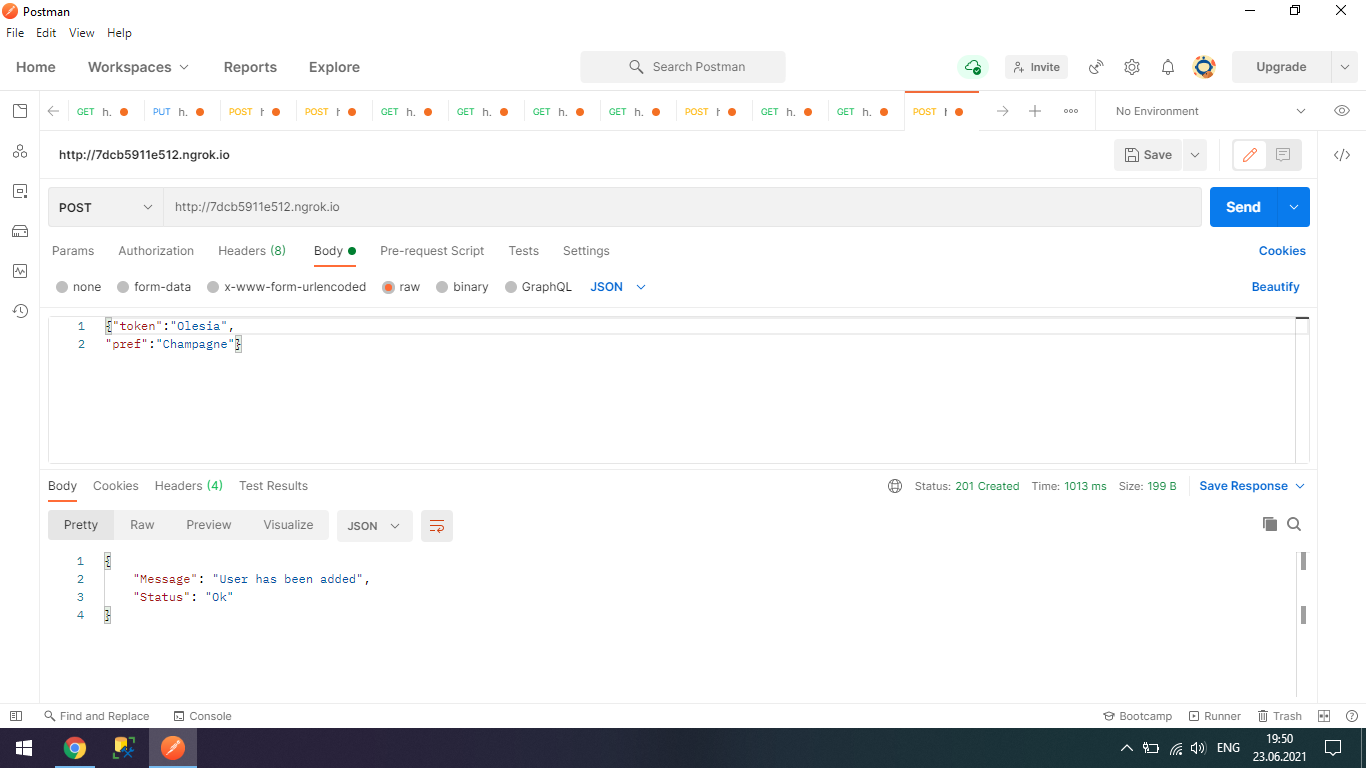

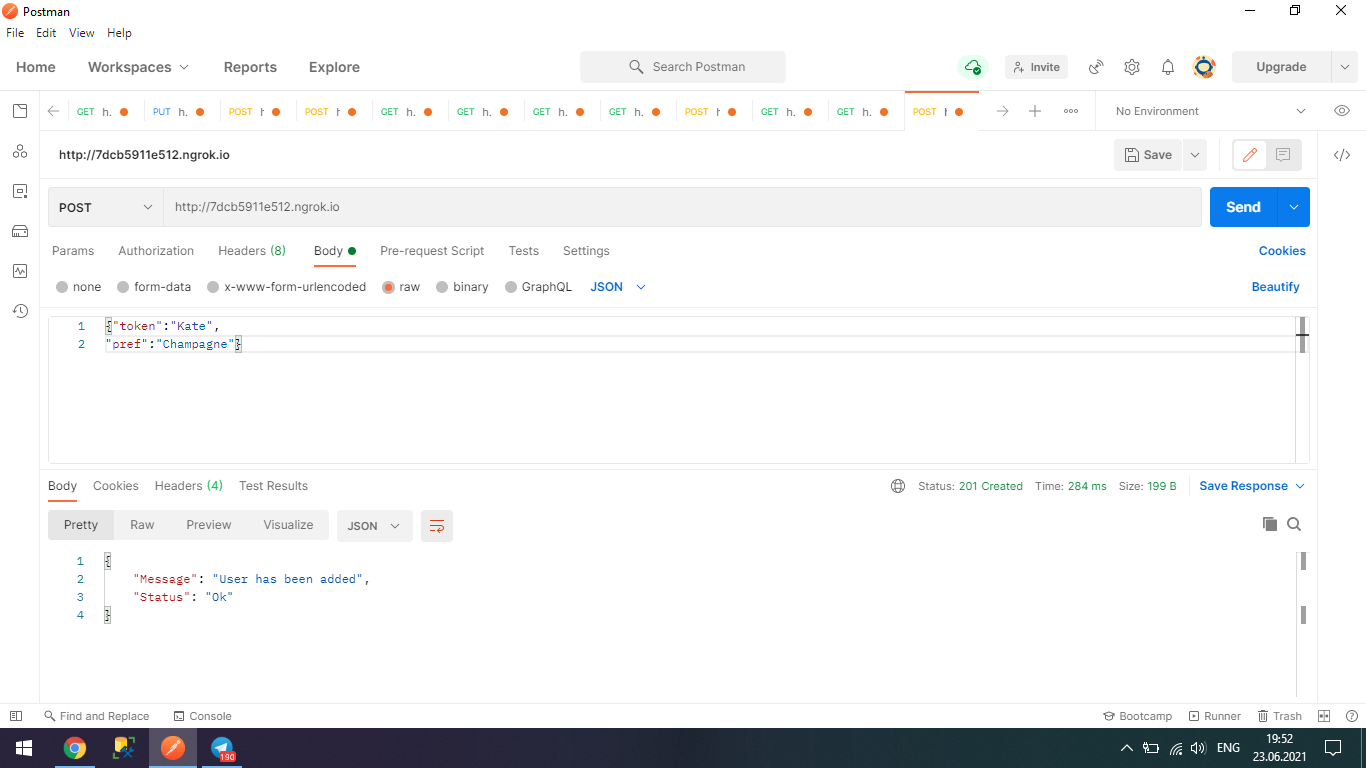

Делаем запрос GET для пользователя "Olesia", получаем следующие результаты (в формате html+css):

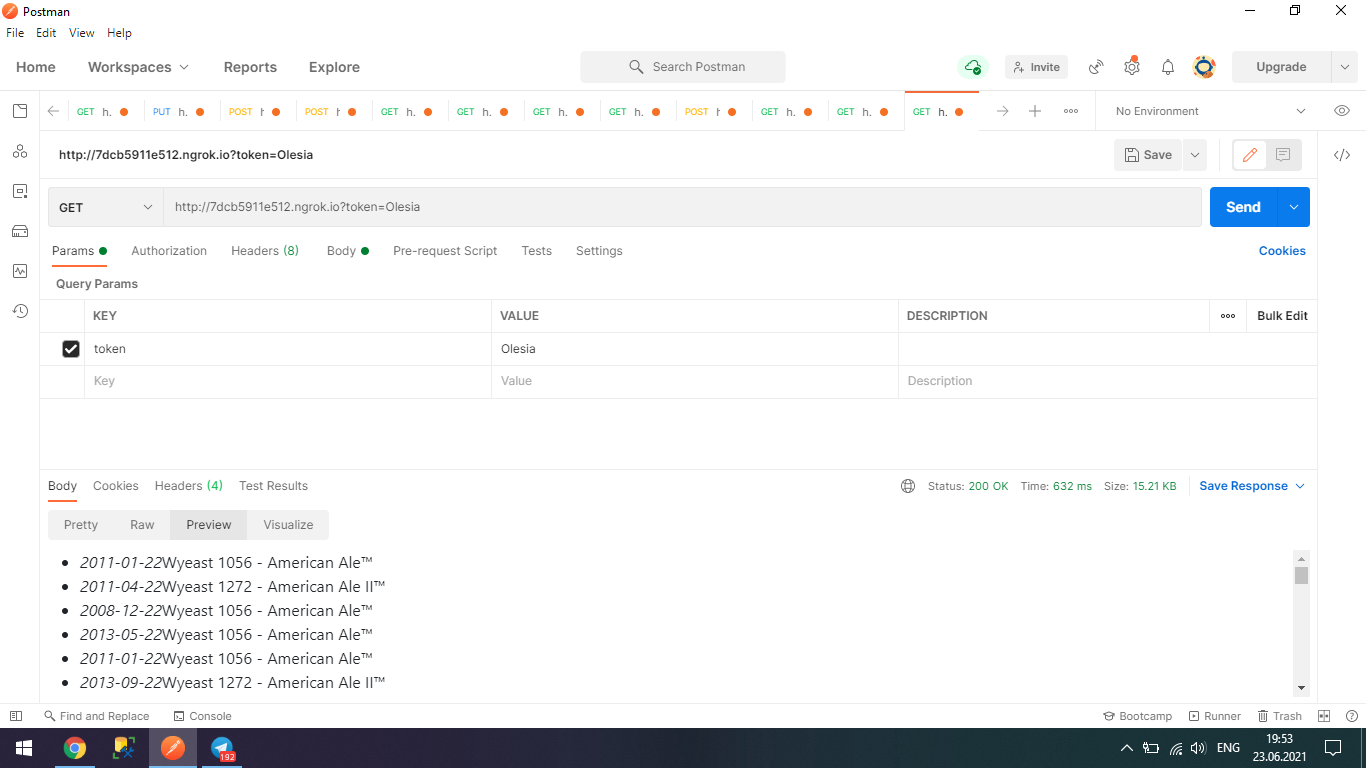